# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [25]:
colors = pd.read_csv('/Users/puru/Desktop/100 Days of Python /Day -74 /LEGO Notebook and Data (start)/data/colors.csv')

In [26]:
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [27]:
colors['name'].nunique()

135

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [28]:
colors.groupby('is_trans').count() 

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [29]:
colors.is_trans.value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [30]:
sets = pd.read_csv('/Users/puru/Desktop/100 Days of Python /Day -74 /LEGO Notebook and Data (start)/data/sets.csv')

In [31]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [32]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [33]:
sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9534,700.2-1,Large Gift Set (ABB),1949,365,178


Looks like LEGO started all the way back in 1949! 😮 The names for these sets are nothing to write home about, but let's find out how many different products the company was selling in their first year since launch:

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [34]:
# Filter rows where year is equal to the first year
sets[sets['year'] == 1949]


,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


Back in 1949, LEGO got started selling only 5 different sets

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [35]:
sets.sort_values('num_parts',ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [36]:
sets_per_year = sets.groupby('year').count()['set_num']

In [37]:
print("LEGO sets released in 1955:", sets_per_year.get(1955, 0))
print("LEGO sets released in 2019:", sets_per_year.get(2019, 0))

LEGO sets released in 1955: 28
LEGO sets released in 2019: 840


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

In [38]:
sets_by_year = sets.groupby('year').count()



In [39]:
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [40]:
sets_by_year['set_num'].tail()

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [43]:
themes = pd.read_csv('/Users/puru/Desktop/100 Days of Python /Day -74 /LEGO Notebook and Data (start)/data/themes.csv')

In [44]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

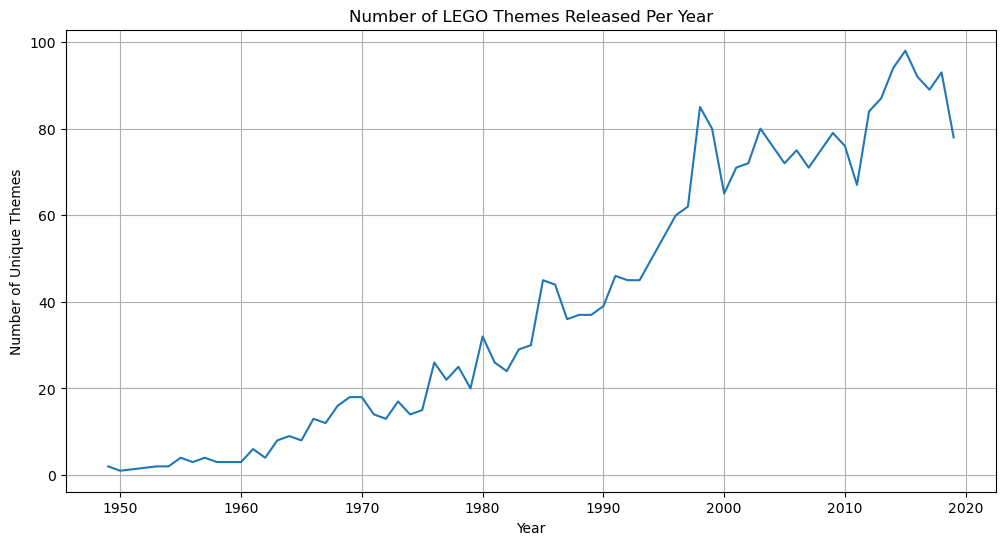

In [47]:
themes_by_year = sets.groupby('year')['theme_id'].nunique()
themes_by_year = themes_by_year[:-2]
plt.figure(figsize=(12, 6))
plt.plot(themes_by_year.index, themes_by_year.values)
plt.title("Number of LEGO Themes Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Unique Themes")
plt.grid(True)
plt.show()

### Line Charts with Two Seperate Axes

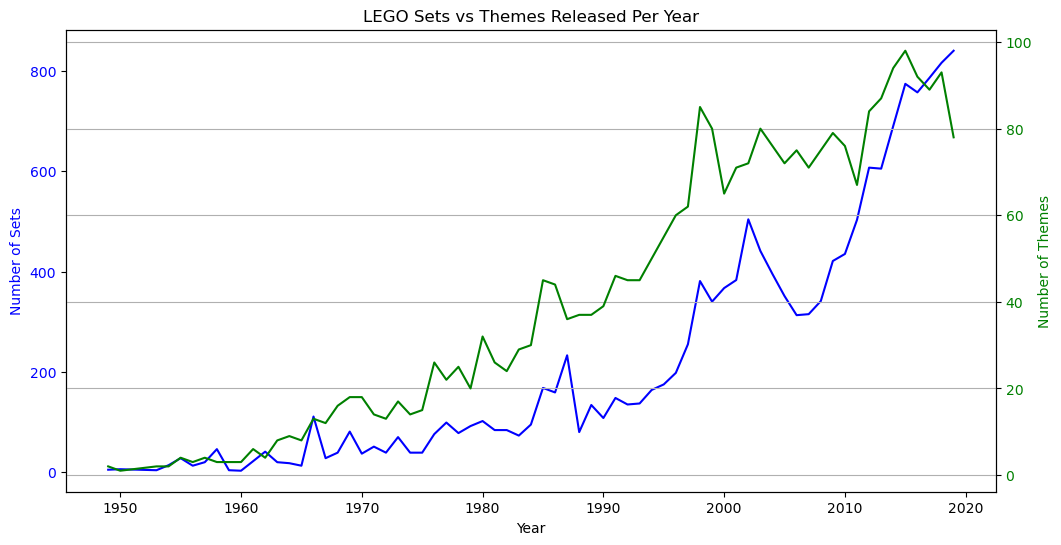

In [48]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# First axis: Number of sets per year
ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color='blue', label='Sets')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Second axis: Number of themes per year
ax2 = ax1.twinx()
themes_by_year = sets.groupby('year')['theme_id'].nunique()[:-2]
ax2.plot(themes_by_year.index, themes_by_year.values, color='green', label='Themes')
ax2.set_ylabel('Number of Themes', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and grid
plt.title("LEGO Sets vs Themes Released Per Year")
plt.grid(True)
plt.show()


**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [49]:
# Group by year and calculate average number of parts
avg_parts_per_year = sets.groupby('year').agg({'num_parts': 'mean'})

# Round values for readability
avg_parts_per_year = avg_parts_per_year.round()

# Get the average for 1954 and 2017
print("1954:", avg_parts_per_year.loc[1954])
print("2017:", avg_parts_per_year.loc[2017])


1954: num_parts    12.0
Name: 1954, dtype: float64
2017: num_parts    222.0
Name: 2017, dtype: float64


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

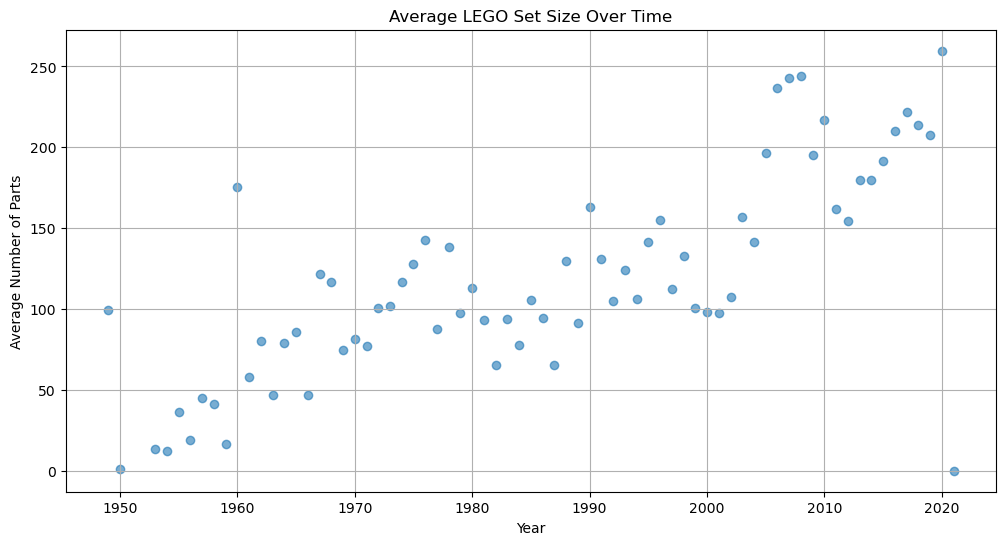

In [50]:
# Calculate average number of parts per year
avg_parts_per_year = sets.groupby('year').agg({'num_parts': 'mean'})

# Create scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(avg_parts_per_year.index, avg_parts_per_year['num_parts'], alpha=0.6)
plt.title("Average LEGO Set Size Over Time")
plt.xlabel("Year")
plt.ylabel("Average Number of Parts")
plt.grid(True)
plt.show()

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [51]:
# Step 1: Count number of sets per theme_id
set_counts = sets['theme_id'].value_counts()

# Step 2: Convert to DataFrame and reset index
set_counts_df = set_counts.reset_index()
set_counts_df.columns = ['id', 'set_count']  # Rename to match 'themes' DataFrame

# Step 3: Merge with themes to get theme names
merged_df = pd.merge(set_counts_df, themes, on='id')

# Step 4: Show top theme
merged_df[['name', 'set_count']].head(1)


,name,set_count
0,Star Wars,753


**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<h3>Database Schema (Simplified)</h3>

<h4>Table: sets</h4>
<table border="1">
  <tr><th>Column</th><th>Data Type</th></tr>
  <tr><td>set_num</td><td>varchar(20)</td></tr>
  <tr><td>name</td><td>varchar(256)</td></tr>
  <tr><td>year</td><td>int4</td></tr>
  <tr><td>theme_id</td><td>int4</td></tr>
  <tr><td>num_parts</td><td>int4</td></tr>
</table>

<h4>Table: themes</h4>
<table border="1">
  <tr><th>Column</th><th>Data Type</th></tr>
  <tr><td>id</td><td>int4</td></tr>
  <tr><td>name</td><td>varchar(40)</td></tr>
  <tr><td>parent_id</td><td>int4</td></tr>
</table>



<img src="https://i.imgur.com/Sg4lcjx.png">


### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [54]:
star_wars_themes = themes[themes['name'].str.contains('Star Wars', case=False, na=False)]
print(star_wars_themes)

      id       name  parent_id
17    18  Star Wars        1.0
150  158  Star Wars        NaN
174  209  Star Wars      207.0
211  261  Star Wars      258.0


In [55]:
matching_theme_ids = star_wars_themes['id']
star_wars_sets = sets[sets['theme_id'].isin(matching_theme_ids)]

In [56]:
print(f"Number of Star Wars sets: {len(star_wars_sets)}")
star_wars_sets.head()

Number of Star Wars sets: 776


,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94


### Merging (i.e., Combining) DataFrames based on a Key


In [57]:
# Merge sets with themes on theme_id (foreign key) and id (primary key)
merged_sets = pd.merge(sets, themes, left_on='theme_id', right_on='id')

# Show first few rows
merged_sets.head()


,set_num,name_x,year,theme_id,num_parts,id,name_y,parent_id
0,001-1,Gears,1965,1,43,1,Technic,NaN
1,0011-2,Town Mini-Figures,1978,84,12,84,Supplemental,67.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,199,Lion Knights,186.0
3,0012-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0
4,0013-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0


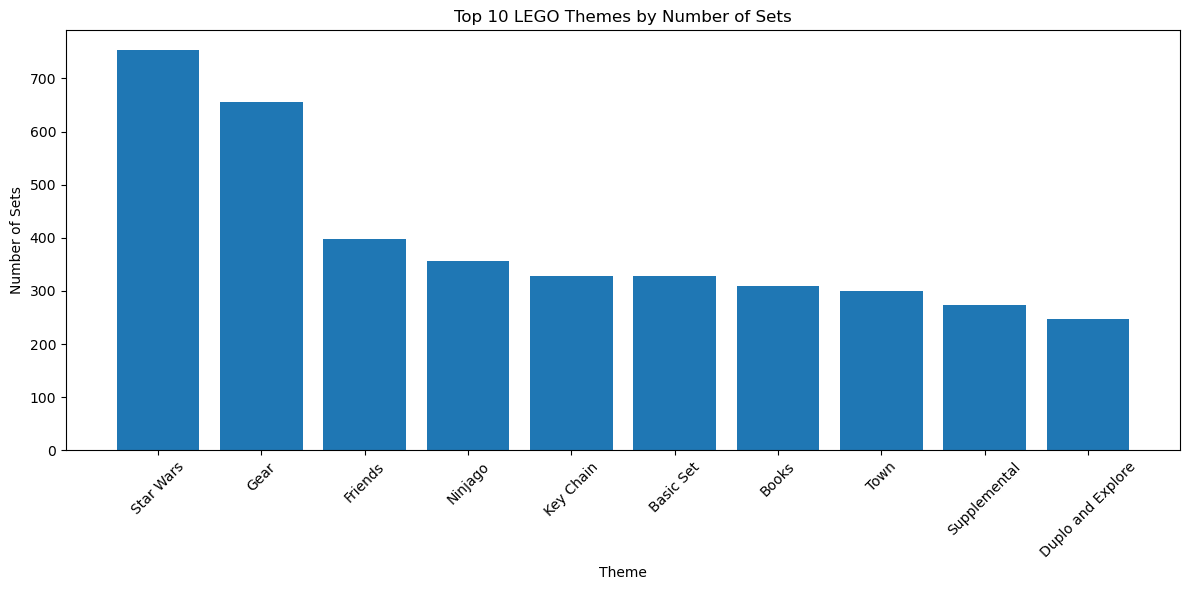

In [58]:
# Sort and get top 10 themes
top_themes = merged_df.sort_values('set_count', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_themes['name'], top_themes['set_count'])
plt.title("Top 10 LEGO Themes by Number of Sets")
plt.xlabel("Theme")
plt.ylabel("Number of Sets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()